In [1]:
import tensorflow as tf
print("Version of tensorflow is := ",tf.__version__)

Version of tensorflow is :=  2.1.0


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow_datasets as tfds
imdb,info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [6]:
train_data = imdb['train']
test_data  = imdb['test']

In [7]:
train_string = []
train_label  = []

test_string  = []
test_label   = []

for s,l in train_data:
    train_string.append(str(s.numpy()))
    train_label.append(l.numpy())
    
for s,l in test_data:
    test_string.append(str(s.numpy()))
    test_label.append(l.numpy())

In [8]:
print("len of train_string := ",len(train_string))
print("len of train_label := ",len(train_label))
print("len of test_string := ",len(test_string))
print("len of test_label := ",len(test_label))

len of train_string :=  25000
len of train_label :=  25000
len of test_string :=  25000
len of test_label :=  25000


In [9]:
type(train_string[0])

str

In [10]:
num_words = 10000
embedding = 16
oov_token = "<OOV>"
max_len   = 120
truncating = "post"

In [11]:
tokenizer = Tokenizer(num_words=num_words,oov_token=oov_token)
tokenizer.fit_on_texts(train_string)
word_index = tokenizer.word_index
seq1 = tokenizer.texts_to_sequences(train_string)
seq2 = tokenizer.texts_to_sequences(test_string)

X_train = pad_sequences(seq1,maxlen = max_len,truncating = truncating)
X_test  = pad_sequences(seq2,maxlen = max_len,truncating = truncating)

In [12]:
y_train = np.array(train_label)
y_test  = np.array(test_label)

In [13]:
print("Shape of X_train := ",X_train.shape)
print("Shape of y_train := ",y_train.shape)
print("======================================")
print("Shape of X_test := ",X_test.shape)
print("Shape of y_test := ",y_test.shape)

Shape of X_train :=  (25000, 120)
Shape of y_train :=  (25000,)
Shape of X_test :=  (25000, 120)
Shape of y_test :=  (25000,)


In [14]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,embedding,input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [16]:
his1 = model1.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - ETA: 24:17 - loss: 0.6935 - acc: 0.50 - ETA: 4:58 - loss: 0.6934 - acc: 0.4625 - ETA: 1:56 - loss: 0.6933 - acc: 0.454 - ETA: 1:06 - loss: 0.6931 - acc: 0.502 - ETA: 47s - loss: 0.6930 - acc: 0.520 - ETA: 37s - loss: 0.6929 - acc: 0.53 - ETA: 34s - loss: 0.6929 - acc: 0.53 - ETA: 33s - loss: 0.6928 - acc: 0.53 - ETA: 28s - loss: 0.6926 - acc: 0.54 - ETA: 25s - loss: 0.6925 - acc: 0.54 - ETA: 21s - loss: 0.6924 - acc: 0.53 - ETA: 19s - loss: 0.6920 - acc: 0.54 - ETA: 17s - loss: 0.6915 - acc: 0.53 - ETA: 16s - loss: 0.6912 - acc: 0.53 - ETA: 14s - loss: 0.6912 - acc: 0.53 - ETA: 13s - loss: 0.6909 - acc: 0.53 - ETA: 12s - loss: 0.6906 - acc: 0.53 - ETA: 12s - loss: 0.6901 - acc: 0.54 - ETA: 11s - loss: 0.6893 - acc: 0.54 - ETA: 10s - loss: 0.6888 - acc: 0.54 - ETA: 9s - loss: 0.6883 - acc: 0.5463 - ETA: 9s - loss: 0.6877 - acc: 0.546 - ETA: 8s - loss: 0.6870 - acc: 0.549 - ETA: 8s

25000/25000 [==============================] - ETA: 5s - loss: 0.2891 - acc: 0.937 - ETA: 4s - loss: 0.3566 - acc: 0.875 - ETA: 4s - loss: 0.3562 - acc: 0.876 - ETA: 3s - loss: 0.3418 - acc: 0.893 - ETA: 3s - loss: 0.3410 - acc: 0.896 - ETA: 3s - loss: 0.3408 - acc: 0.895 - ETA: 3s - loss: 0.3370 - acc: 0.899 - ETA: 3s - loss: 0.3405 - acc: 0.895 - ETA: 3s - loss: 0.3420 - acc: 0.891 - ETA: 3s - loss: 0.3412 - acc: 0.889 - ETA: 3s - loss: 0.3418 - acc: 0.888 - ETA: 3s - loss: 0.3405 - acc: 0.889 - ETA: 3s - loss: 0.3389 - acc: 0.891 - ETA: 3s - loss: 0.3388 - acc: 0.892 - ETA: 3s - loss: 0.3388 - acc: 0.890 - ETA: 3s - loss: 0.3369 - acc: 0.892 - ETA: 3s - loss: 0.3388 - acc: 0.891 - ETA: 3s - loss: 0.3393 - acc: 0.891 - ETA: 3s - loss: 0.3368 - acc: 0.893 - ETA: 3s - loss: 0.3361 - acc: 0.894 - ETA: 3s - loss: 0.3365 - acc: 0.893 - ETA: 2s - loss: 0.3355 - acc: 0.894 - ETA: 2s - loss: 0.3366 - acc: 0.891 - ETA: 2s - loss: 0.3356 - acc: 0.893 - ETA: 2s - loss: 0.3351 - acc: 0.892 - ETA

25000/25000 [==============================] - ETA: 5s - loss: 0.2518 - acc: 0.906 - ETA: 4s - loss: 0.2391 - acc: 0.911 - ETA: 3s - loss: 0.2401 - acc: 0.923 - ETA: 3s - loss: 0.2292 - acc: 0.929 - ETA: 3s - loss: 0.2268 - acc: 0.925 - ETA: 3s - loss: 0.2304 - acc: 0.923 - ETA: 3s - loss: 0.2337 - acc: 0.923 - ETA: 3s - loss: 0.2307 - acc: 0.926 - ETA: 2s - loss: 0.2366 - acc: 0.923 - ETA: 2s - loss: 0.2327 - acc: 0.926 - ETA: 2s - loss: 0.2330 - acc: 0.926 - ETA: 2s - loss: 0.2305 - acc: 0.928 - ETA: 2s - loss: 0.2280 - acc: 0.931 - ETA: 2s - loss: 0.2296 - acc: 0.930 - ETA: 2s - loss: 0.2288 - acc: 0.930 - ETA: 2s - loss: 0.2266 - acc: 0.931 - ETA: 2s - loss: 0.2276 - acc: 0.930 - ETA: 2s - loss: 0.2285 - acc: 0.930 - ETA: 2s - loss: 0.2300 - acc: 0.929 - ETA: 2s - loss: 0.2308 - acc: 0.929 - ETA: 2s - loss: 0.2323 - acc: 0.928 - ETA: 2s - loss: 0.2302 - acc: 0.929 - ETA: 2s - loss: 0.2304 - acc: 0.928 - ETA: 2s - loss: 0.2291 - acc: 0.929 - ETA: 2s - loss: 0.2285 - acc: 0.929 - ETA

25000/25000 [==============================] - ETA: 3s - loss: 0.2332 - acc: 0.906 - ETA: 4s - loss: 0.1793 - acc: 0.943 - ETA: 3s - loss: 0.1551 - acc: 0.961 - ETA: 3s - loss: 0.1479 - acc: 0.965 - ETA: 3s - loss: 0.1487 - acc: 0.965 - ETA: 3s - loss: 0.1463 - acc: 0.965 - ETA: 3s - loss: 0.1422 - acc: 0.966 - ETA: 3s - loss: 0.1437 - acc: 0.967 - ETA: 3s - loss: 0.1447 - acc: 0.965 - ETA: 3s - loss: 0.1450 - acc: 0.963 - ETA: 3s - loss: 0.1445 - acc: 0.963 - ETA: 3s - loss: 0.1475 - acc: 0.962 - ETA: 3s - loss: 0.1470 - acc: 0.962 - ETA: 3s - loss: 0.1476 - acc: 0.961 - ETA: 3s - loss: 0.1485 - acc: 0.961 - ETA: 3s - loss: 0.1507 - acc: 0.960 - ETA: 3s - loss: 0.1528 - acc: 0.958 - ETA: 2s - loss: 0.1541 - acc: 0.958 - ETA: 2s - loss: 0.1533 - acc: 0.959 - ETA: 2s - loss: 0.1524 - acc: 0.959 - ETA: 2s - loss: 0.1535 - acc: 0.959 - ETA: 2s - loss: 0.1538 - acc: 0.959 - ETA: 2s - loss: 0.1544 - acc: 0.958 - ETA: 2s - loss: 0.1548 - acc: 0.958 - ETA: 2s - loss: 0.1551 - acc: 0.958 - ETA

25000/25000 [==============================] - ETA: 4s - loss: 0.2573 - acc: 0.875 - ETA: 5s - loss: 0.1148 - acc: 0.961 - ETA: 5s - loss: 0.1134 - acc: 0.966 - ETA: 4s - loss: 0.1134 - acc: 0.970 - ETA: 4s - loss: 0.1032 - acc: 0.974 - ETA: 3s - loss: 0.1032 - acc: 0.976 - ETA: 3s - loss: 0.1026 - acc: 0.976 - ETA: 3s - loss: 0.1010 - acc: 0.977 - ETA: 3s - loss: 0.1017 - acc: 0.978 - ETA: 3s - loss: 0.1033 - acc: 0.977 - ETA: 3s - loss: 0.1032 - acc: 0.977 - ETA: 3s - loss: 0.1030 - acc: 0.976 - ETA: 3s - loss: 0.1071 - acc: 0.975 - ETA: 3s - loss: 0.1078 - acc: 0.974 - ETA: 3s - loss: 0.1086 - acc: 0.973 - ETA: 3s - loss: 0.1111 - acc: 0.972 - ETA: 3s - loss: 0.1119 - acc: 0.972 - ETA: 3s - loss: 0.1107 - acc: 0.972 - ETA: 3s - loss: 0.1106 - acc: 0.972 - ETA: 3s - loss: 0.1113 - acc: 0.972 - ETA: 3s - loss: 0.1127 - acc: 0.972 - ETA: 3s - loss: 0.1139 - acc: 0.972 - ETA: 3s - loss: 0.1141 - acc: 0.971 - ETA: 3s - loss: 0.1138 - acc: 0.971 - ETA: 3s - loss: 0.1158 - acc: 0.970 - ETA

25000/25000 [==============================] - ETA: 4s - loss: 0.1357 - acc: 0.968 - ETA: 4s - loss: 0.1272 - acc: 0.972 - ETA: 4s - loss: 0.1048 - acc: 0.979 - ETA: 5s - loss: 0.0996 - acc: 0.979 - ETA: 5s - loss: 0.0943 - acc: 0.980 - ETA: 4s - loss: 0.0918 - acc: 0.980 - ETA: 4s - loss: 0.0915 - acc: 0.979 - ETA: 4s - loss: 0.0922 - acc: 0.978 - ETA: 4s - loss: 0.0922 - acc: 0.978 - ETA: 4s - loss: 0.0919 - acc: 0.978 - ETA: 4s - loss: 0.0898 - acc: 0.979 - ETA: 4s - loss: 0.0897 - acc: 0.978 - ETA: 4s - loss: 0.0878 - acc: 0.979 - ETA: 4s - loss: 0.0879 - acc: 0.979 - ETA: 4s - loss: 0.0885 - acc: 0.979 - ETA: 4s - loss: 0.0877 - acc: 0.980 - ETA: 4s - loss: 0.0888 - acc: 0.980 - ETA: 4s - loss: 0.0891 - acc: 0.980 - ETA: 4s - loss: 0.0905 - acc: 0.978 - ETA: 4s - loss: 0.0914 - acc: 0.978 - ETA: 4s - loss: 0.0906 - acc: 0.978 - ETA: 4s - loss: 0.0933 - acc: 0.977 - ETA: 4s - loss: 0.0933 - acc: 0.977 - ETA: 4s - loss: 0.0928 - acc: 0.977 - ETA: 4s - loss: 0.0939 - acc: 0.977 - ETA

25000/25000 [==============================] - ETA: 6s - loss: 0.0409 - acc: 1.000 - ETA: 5s - loss: 0.0875 - acc: 0.980 - ETA: 5s - loss: 0.0988 - acc: 0.974 - ETA: 5s - loss: 0.1114 - acc: 0.972 - ETA: 4s - loss: 0.1079 - acc: 0.974 - ETA: 4s - loss: 0.1015 - acc: 0.976 - ETA: 4s - loss: 0.1042 - acc: 0.975 - ETA: 4s - loss: 0.1004 - acc: 0.976 - ETA: 4s - loss: 0.0990 - acc: 0.976 - ETA: 4s - loss: 0.0967 - acc: 0.976 - ETA: 4s - loss: 0.0946 - acc: 0.977 - ETA: 4s - loss: 0.0930 - acc: 0.978 - ETA: 4s - loss: 0.0935 - acc: 0.978 - ETA: 4s - loss: 0.0905 - acc: 0.979 - ETA: 4s - loss: 0.0917 - acc: 0.979 - ETA: 4s - loss: 0.0903 - acc: 0.979 - ETA: 4s - loss: 0.0911 - acc: 0.979 - ETA: 4s - loss: 0.0917 - acc: 0.980 - ETA: 4s - loss: 0.0922 - acc: 0.979 - ETA: 4s - loss: 0.0925 - acc: 0.979 - ETA: 3s - loss: 0.0923 - acc: 0.979 - ETA: 3s - loss: 0.0902 - acc: 0.979 - ETA: 3s - loss: 0.0897 - acc: 0.980 - ETA: 3s - loss: 0.0893 - acc: 0.980 - ETA: 3s - loss: 0.0908 - acc: 0.979 - ETA

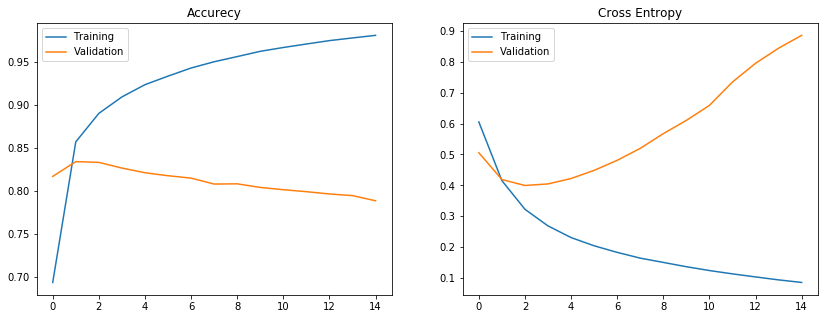

In [17]:
_,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(his1.history['acc'],label = "Training")
ax[0].plot(his1.history['val_acc'],label = "Validation")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his1.history['loss'],label = "Training")
ax[1].plot(his1.history['val_loss'],label = "Validation")
ax[1].set_title("Cross Entropy")
ax[1].legend()

In [18]:
his1.history['val_acc']

[0.81664,
 0.83384,
 0.83296,
 0.82636,
 0.82092,
 0.81744,
 0.81468,
 0.80776,
 0.80804,
 0.80384,
 0.8012,
 0.79892,
 0.79624,
 0.79436,
 0.78836]

In [19]:
e = model1.layers[0]
weights = e.get_weights()[0]
weights.shape

(10000, 16)

In [27]:
import io

In [28]:
out_v = io.open("vecs1_new.tsv",'w',encoding='utf-8')
out_m = io.open("meta1_new.tsv",'w',encoding='utf-8')

In [29]:
rev_word_index = {}
for k,v in word_index.items():
    rev_word_index[v] = k

In [30]:
for i in range(1,num_words):
    word = rev_word_index[i]
    embedding = weights[i]
    out_m.write(word+"\n")
    out_v.write("\t".join([str(x) for x in embedding])+"\n")
    if i%999==0:
        print(i)

999
1998
2997
3996
4995
5994
6993
7992
8991
9990


In [31]:
out_m.close()

In [32]:
out_v.close()